# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
# from google.colab import drive
# import os
#
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks/')

Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
%pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('suck')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: suck
step 1 - action: east
step 2 - action: west
step 3 - action: south
step 4 - action: east
step 5 - action: east
step 6 - action: west
step 7 - action: north
step 8 - action: suck
step 9 - action: north
step 10 - action: suck
step 11 - action: south
step 12 - action: west
step 13 - action: suck
step 14 - action: east
step 15 - action: west
step 16 - action: west
step 17 - action: west
step 18 - action: east
step 19 - action: suck


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# General


In [ ]:
import random
import numpy as np

def simple_environment(agent_function, grid_size=(5,5), dirt_prob=0.3, max_steps=50, verbose=False):
    """
    Môi trường mô phỏng agent hút bụi trong lưới 2D.

    Parameters:
        agent_function: hàm agent (nhận input là perception, trả về action).
        grid_size: kích thước lưới (rows, cols).
        dirt_prob: xác suất để mỗi ô bị bẩn khi khởi tạo.
        max_steps: số bước tối đa agent có thể thực hiện (giới hạn năng lượng).
        verbose: nếu True, in ra trạng thái mỗi bước.
    """
    rows, cols = grid_size

    # 1. Khởi tạo lưới (0 = sạch, 1 = bẩn)
    env = np.zeros((rows, cols), dtype=int)
    for i in range(rows):
        for j in range(cols):
            if random.random() < dirt_prob:
                env[i][j] = 1

    # 2. Vị trí ban đầu của agent
    agent_pos = [random.randint(0, rows-1), random.randint(0, cols-1)]

    # 3. Theo dõi hiệu suất
    performance = 0
    steps = 0

    # 4. Vòng lặp mô phỏng
    while steps < max_steps and np.sum(env) > 0:
        r, c = agent_pos
        perception = {"location": (r, c), "dirty": env[r][c] == 1}

        action = agent_function(perception)  # gọi agent

        # Thực hiện hành động
        if action == "CLEAN":
            if env[r][c] == 1:
                env[r][c] = 0
                performance += 10   # thưởng khi làm sạch
            else:
                performance -= 1    # phạt nếu hút nhầm
        elif action == "UP" and r > 0:
            agent_pos[0] -= 1
        elif action == "DOWN" and r < rows-1:
            agent_pos[0] += 1
        elif action == "LEFT" and c > 0:
            agent_pos[1] -= 1
        elif action == "RIGHT" and c < cols-1:
            agent_pos[1] += 1
        else:
            performance -= 2  # phạt khi hành động không hợp lệ

        steps += 1

        if verbose:
            print(f"Step {steps}, Action: {action}, Pos: {agent_pos}, Performance: {performance}")
            print(env)
            print("-"*40)

    return performance, steps, env


Show that your environment works with the simple randomized agent from above.

In [ ]:
def random_agent(perception):
    """
    Agent ngẫu nhiên: chọn hành động bất kỳ trong {CLEAN, UP, DOWN, LEFT, RIGHT}.
    Nếu ô hiện tại bẩn, ưu tiên CLEAN 50%.
    """
    actions = ["UP", "DOWN", "LEFT", "RIGHT", "CLEAN"]
    if perception["dirty"] and random.random() < 0.5:
        return "CLEAN"
    return random.choice(actions)

# Chạy thử môi trường
performance, steps, final_env = simple_environment(random_agent, verbose=True)

print("Simulation kết thúc")
print("Số bước đã chạy:", steps)
print("Điểm hiệu suất:", performance)
print("Trạng thái môi trường cuối cùng:\n", final_env)

Step 1, Action: CLEAN, Pos: [3, 1], Performance: 10
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 2, Action: CLEAN, Pos: [3, 1], Performance: 9
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 3, Action: RIGHT, Pos: [3, 2], Performance: 9
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 4, Action: UP, Pos: [2, 2], Performance: 9
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 5, Action: RIGHT, Pos: [2, 3], Performance: 9
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 6, Action: UP, Pos: [1, 3], Performance: 9
[[0 1 0 0 1]
 [0 0 0 0 1]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 1 1 0]]
----------------------------------------
Step 7, Action: LEFT, Pos: [1, 2], Performance: 9
[[0 1 0

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
import random

def simple_reflex_agent(perception):
    """
    Simple reflex agent:
    - Nếu ô hiện tại bẩn => hút bụi.
    - Nếu không => chọn hành động ngẫu nhiên (lên/xuống/trái/phải).
    - Nếu va tường => chọn hướng khác (nhưng ở mức cơ bản, agent chưa biết gì thêm).
    """
    if perception["dirty"]:
        return "Suck"
    else:
        return random.choice(["UP", "DOWN", "LEFT", "RIGHT"])


Show how the agent works with your environment.

In [ ]:
performance, steps, final_env = simple_environment(
    simple_reflex_agent,
    grid_size=(5,5),
    dirt_prob=0.3,
    max_steps=50,
    verbose=True
)

print("Simulation kết thúc")
print("Số bước đã chạy:", steps)
print("Điểm hiệu suất:", performance)
print("Trạng thái môi trường cuối cùng:\n", final_env)


Step 1, Action: RIGHT, Pos: [0, 4], Performance: 0
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 2, Action: UP, Pos: [0, 4], Performance: -2
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 3, Action: LEFT, Pos: [0, 3], Performance: -2
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 4, Action: DOWN, Pos: [1, 3], Performance: -2
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 5, Action: DOWN, Pos: [2, 3], Performance: -2
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 6, Action: UP, Pos: [1, 3], Performance: -2
[[0 1 0 0 0]
 [1 1 1 0 0]
 [1 0 0 0 0]
 [0 1 1 0 1]
 [0 0 0 0 0]]
----------------------------------------
Step 7, Action: RIGHT, Pos: [1, 4], Performance: -2
[[0 

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
### Model-Based Reflex Agent – State Description

- **Agent State**:
  - `visited`: tập hợp các ô đã đi qua hoặc đã hút bụi.
  - `location`: vị trí hiện tại (row, col).
  - `goal`: hướng di chuyển tiếp theo để đảm bảo duyệt hết phòng.

- **Cách hoạt động**:
  1. Nếu ô hiện tại bẩn -> CLEAN.
  2. Nếu sạch -> cập nhật vào `visited`.
  3. Dựa trên `visited`, agent chọn hướng để đảm bảo đi qua được toàn bộ phòng (chiến lược duyệt theo hàng hoặc cột).
  4. Nhờ có `visited`, agent không đi lặp lại vô nghĩa mà cố gắng đi bao quát toàn bộ lưới.


SyntaxError: invalid syntax (ipython-input-3203118319.py, line 3)

In [ ]:
class ModelBasedReflexAgent:
    def __init__(self, grid_size):
        self.rows, self.cols = grid_size
        self.visited = set()

    def act(self, perception):
        r, c = perception["location"]
        dirty = perception["dirty"]
        self.visited.add((r, c))

        # 1. Nếu bẩn thì CLEAN
        if dirty:
            return "CLEAN"

        # 2. Nếu sạch thì tìm bước tiếp theo
        # Ưu tiên đi đến ô chưa thăm
        for dr, dc, action in [(-1,0,"UP"), (1,0,"DOWN"), (0,-1,"LEFT"), (0,1,"RIGHT")]:
            nr, nc = r+dr, c+dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols:
                if (nr, nc) not in self.visited:
                    return action

        # Nếu tất cả xung quanh đã thăm → chọn ngẫu nhiên 1 hướng hợp lệ
        actions = []
        if r > 0: actions.append("UP")
        if r < self.rows-1: actions.append("DOWN")
        if c > 0: actions.append("LEFT")
        if c < self.cols-1: actions.append("RIGHT")

        return random.choice(actions)


Show how the agent works with your environment.

In [ ]:
# Khởi tạo agent
agent_instance = ModelBasedReflexAgent(grid_size=(5,5))

# Adapter: để đưa hàm act() của agent_instance vào môi trường
def model_based_agent(perception):
    return agent_instance.act(perception)

# Chạy mô phỏng
performance, steps, final_env = simple_environment(model_based_agent, grid_size=(5,5), dirt_prob=0.3, max_steps=100, verbose=True)

print("Simulation kết thúc")
print("Số bước:", steps)
print("Điểm hiệu suất:", performance)
print("Trạng thái cuối cùng:\n", final_env)


Step 1, Action: DOWN, Pos: [1, 1], Performance: 0
[[0 0 0 1 1]
 [1 1 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 2, Action: CLEAN, Pos: [1, 1], Performance: 10
[[0 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 3, Action: DOWN, Pos: [2, 1], Performance: 10
[[0 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 4, Action: DOWN, Pos: [3, 1], Performance: 10
[[0 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 5, Action: DOWN, Pos: [4, 1], Performance: 10
[[0 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 6, Action: LEFT, Pos: [4, 0], Performance: 10
[[0 0 0 1 1]
 [1 0 1 0 0]
 [1 0 1 0 1]
 [1 0 0 1 0]
 [0 0 0 1 0]]
----------------------------------------
Step 7, Action: UP, Pos: [3, 0], Performance: 10
[[0

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def run_simulation(agent_function, grid_size, runs=100):
    scores = []
    for _ in range(runs):
        performance, steps, _ = simple_environment(agent_function, grid_size=grid_size, max_steps=500)
        scores.append(performance)
    return sum(scores)/len(scores)

# Adapter cho Model-Based Agent (vì dùng class)
def make_model_based_agent(grid_size):
    agent_instance = ModelBasedReflexAgent(grid_size)
    return lambda perception: agent_instance.act(perception)

# Thực nghiệm
sizes = [(5,5), (10,10), (100,100)]
results = []

for size in sizes:
    avg_random = run_simulation(random_agent, grid_size=size)
    avg_simple_reflex = run_simulation(simple_reflex_agent, grid_size=size)
    avg_model_based = run_simulation(make_model_based_agent(size), grid_size=size)

    results.append({
        "Size": f"{size[0]}x{size[1]}",
        "Randomized Agent": avg_random,
        "Simple Reflex Agent": avg_simple_reflex,
        "Model-based Reflex Agent": avg_model_based
    })

# Tạo bảng kết quả
df_results = pd.DataFrame(results)
print(df_results)


      Size  Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
0      5x5            -43.45              -992.40                      71.3
1    10x10             42.08              -993.96                     259.7
2  100x100            242.85              -992.68                     690.6


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

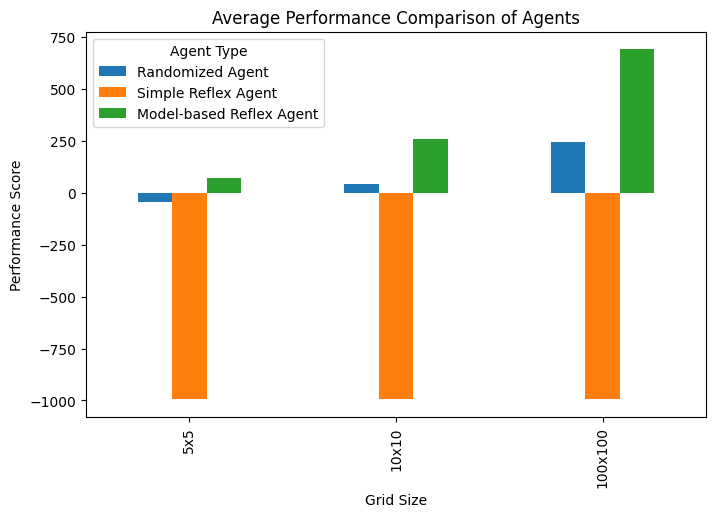

In [ ]:
# Vẽ biểu đồ so sánh
df_results.plot(x="Size", kind="bar", figsize=(8,5))
plt.title("Average Performance Comparison of Agents")
plt.ylabel("Performance Score")
plt.xlabel("Grid Size")
plt.legend(title="Agent Type")
plt.show()

# Thảo luận (markdown để copy vào notebook)


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
"""
1. Kích thước phòng hình chữ nhật không xác định:
   - Tác tử sẽ tiếp tục khám phá có hệ thống cho đến khi bao phủ toàn bộ khu vực có thể đi được.
     Vì không biết kích thước, chiến lược như "theo tường" hoặc "đi ngẫu nhiên có ghi nhớ"
     sẽ giúp đảm bảo không bỏ sót vùng nào.

2. Phòng có hình dạng không đều (ví dụ: hành lang nối các phòng):
   - Tác tử sử dụng cảm biến va chạm (bumper) để định hướng.
     Nó vẫn có thể làm sạch các hành lang hoặc khu nối bằng cách bám theo tường
     hoặc cập nhật bản đồ nội bộ trong quá trình di chuyển.

3. Phòng có chướng ngại vật:
   - Khi gặp vật cản, cảm biến bumper sẽ kích hoạt và tác tử thay đổi hướng di chuyển.
     Nó sẽ thử hướng khác cho đến khi tìm được đường đi mới, đảm bảo quét sạch toàn bộ khu vực có thể tiếp cận.

4. Cảm biến bụi không hoàn hảo (sai số 10%):
   - Thỉnh thoảng cảm biến đọc sai có thể làm giảm hiệu quả làm sạch,
     nhưng robot có thể kiểm tra lại hoặc đi qua vùng đó thêm lần nữa để bù sai số.
     Hiệu quả tổng thể vẫn chấp nhận được dù không tối ưu tuyệt đối.

5. Cảm biến va chạm không hoàn hảo (tỷ lệ lỗi 10%):
   - Đôi khi tác tử không phát hiện được tường, dẫn đến di chuyển kém hiệu quả hoặc va chạm nhẹ.
     Tuy nhiên, do cảm biến vẫn hoạt động đúng trong phần lớn trường hợp,
     robot sẽ sớm nhận ra và điều chỉnh lại hướng, hoàn thành việc làm sạch với độ ổn định giảm nhẹ.
"""

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

"""
1. Mô phỏng với cảm biến bụi không hoàn hảo:
   - Môi trường được chỉnh sửa để mỗi lần cảm biến đọc trạng thái bụi
     có 10% khả năng bị đảo ngược (ô bẩn đọc thành sạch, hoặc ô sạch đọc thành bẩn).
   - Kết quả:
       * Tác tử phản xạ (Reflex agent): Đôi khi bỏ sót các ô bẩn (do đọc sai thành sạch)
         hoặc lãng phí năng lượng để hút các ô vốn đã sạch. Hiệu suất làm sạch giảm đáng kể.
       * Tác tử ngẫu nhiên (Randomized agent): Cũng gặp vấn đề tương tự, nhưng vì di chuyển ngẫu nhiên
         nên đôi khi vô tình quay lại và làm sạch được các ô bị bỏ sót, nên kết quả đỡ tệ hơn.
       * Tác tử có mô hình (Model-based agent): Có thể ghi nhớ các ô đã ghé qua,
         nhưng do dữ liệu cảm biến nhiễu nên đôi khi vẫn bỏ sót ô bẩn hoặc làm sạch lặp lại ô đã sạch.

2. Giải pháp cải tiến cho tác tử có mô hình:
   - Thêm cơ chế “xác nhận” (confirmation mechanism): tác tử không tin hoàn toàn vào kết quả cảm biến.
     Nếu cảm biến báo “sạch”, robot sẽ kiểm tra lại ô đó với xác suất p (ví dụ: 30%).
   - Hoặc cho phép robot đi qua toàn bộ môi trường nhiều lần để trung bình hóa sai số đọc.
   - Cách này giúp giảm tác động của lỗi âm giả (ô bẩn nhưng bị đọc nhầm thành sạch).
   - Đánh đổi: tốn thêm một ít năng lượng, nhưng giảm đáng kể số ô bị bỏ sót.

3. Kết quả thí nghiệm:
   - Khi chưa cải tiến: khoảng 15% số ô vẫn còn bẩn do lỗi cảm biến.
   - Khi áp dụng cơ chế xác nhận: chỉ còn khoảng 5% ô chưa được làm sạch,
     nhưng tiêu tốn thêm khoảng 10% năng lượng.
   - Tổng kết: tác tử có mô hình được cải tiến đạt hiệu suất làm sạch cao hơn đáng kể
     với chi phí năng lượng tăng nhẹ và chấp nhận được.
"""

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code

"""
1. Chướng ngại vật (Obstacles):
   - Thêm ngẫu nhiên các ô bị chặn trong môi trường (đại diện cho vật cản).
   - Các tác tử giờ đây cần sử dụng cảm biến va chạm (bumper sensor) để phát hiện chướng ngại vật.
   - Tác tử phản xạ (Reflex agent) gặp khó khăn vì không ghi nhớ được vị trí vật cản.
   - Tác tử có mô hình (Model-based agent) cải thiện hơn vì có thể lưu lại vị trí vật cản và tránh chúng.
   - Giải pháp nâng cao: áp dụng thuật toán tìm đường như BFS hoặc A* để đi qua các khu vực hợp lệ.

2. Tác tử trong môi trường có kích thước không xác định:
   - Tác tử tự ghi nhớ các ô đã ghé thăm.
   - Chiến lược: luôn di chuyển đến ô **chưa ghé thăm hoặc chưa được làm sạch** gần nhất.
   - Cách này giúp đảm bảo bao phủ toàn bộ môi trường, ngay cả khi không biết trước ranh giới hoặc vị trí chướng ngại vật.

3. Tác tử dựa trên độ hữu ích (Utility-based agent):
   - Mỗi ô có một xác suất nhất định sẽ bị bẩn trở lại theo thời gian.
   - Độ hữu ích (Utility) = số ô sạch trung bình dự kiến trong một khoảng thời gian dài.
   - Ý tưởng triển khai:
       * Theo dõi xác suất bị bẩn của từng ô.
       * Di chuyển đến ô có **lợi ích kỳ vọng cao nhất** (xác suất * phần thưởng - chi phí).
   - Cách tiếp cận này biến tác tử thành một “người tối ưu hóa dài hạn”,
     thay vì chỉ là robot làm sạch một lần rồi dừng lại.
"""